In [1]:
## ************ Importation des libraries ******************
import pandas as pd ##une librarie d'analyse et manipulation de données
import numpy as np ##librairie destinée à l'analyse et manipulation des matrices et des tableaux multidimentionnels
import matplotlib.pyplot as plt ## librarie pour la représentation graphique 
import math
## la librairie de sklearn est destinée à l'apprentissage automatique 
from sklearn.model_selection import train_test_split ##ceci est pour la division du dataset en un training set et un testing set
from sklearn.linear_model import LinearRegression
from sklearn import metrics ## les différents metriques qu'on va utiliser pour mesurer la performance de notre modèle
import joblib  ##librarie pour la transformation des modèles en des fichiers .pkl pour les exploiter dans le site web

In [2]:
#lecture de dataset en dataframe
df = pd.read_csv('df_linreg.csv')
df = df.drop(df.columns[0],axis=1)

In [3]:
#garder juste G1 comme feature et G3 comme target
df = df[["G1","G3"]]
df

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10
...,...,...
390,9,9
391,14,16
392,10,7
393,11,10


In [4]:
# division du feature et de target 
X= df.drop(["G3"], axis=1)
y= df["G3"]

In [5]:
#division du dataset en un training set et un testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
## application de la régression linéraire
model = LinearRegression()
## training du modèle
model.fit(X_train, y_train)

LinearRegression()

In [6]:
#prediction sur X_test
predicted = model.predict(X_test)
#utilisation des differentes métriques pour mesurer la performance du modèle
print ("MSE :", metrics.mean_squared_error(y_test, predicted))
print("R squared :", metrics.r2_score(y_test, predicted))
print(np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MSE : 8.38800753657445
R squared : 0.6959638345717838
2.8962057137873427


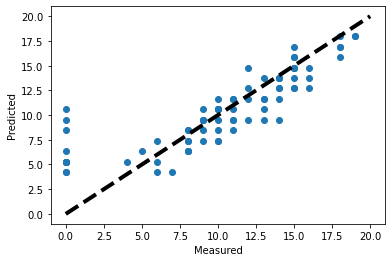

In [7]:
## graphe pour montrer la difference entre les valeurs attendus et les valeurss predicted 
fig, ax = plt.subplots()
ax.scatter(y_test,predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [8]:
# enregistrement du modèle pour l'exploiter dans le site web
linreg_file = "Model3/linreg_model3.pkl"
joblib.dump(model, linreg_file)

['Model3/linreg_model3.pkl']